0.6346250268739876
Epoch: 0          Loss: 197.870910645 LR: [0.01]
Epoch: 100        Loss: 186.203338623 LR: [0.01]
Epoch: 107        Lr was reduced to: [0.001]
Epoch: 109        Loss did not change (186.1964569091797)

Optimum is attained. Loss: 186.19644165039062. Epochs: 111 epochs.


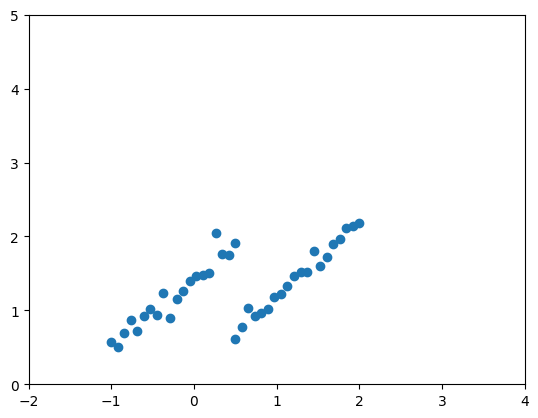

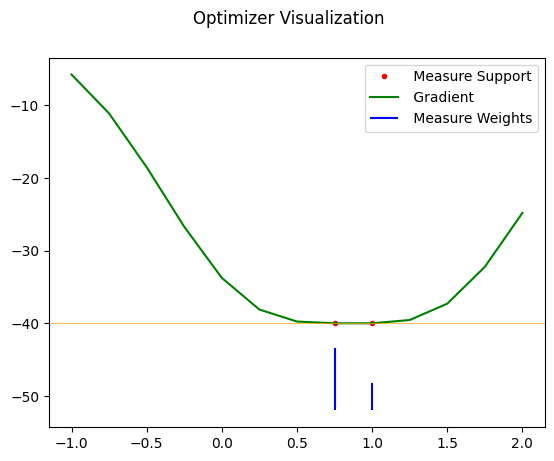

In [1]:
import torch
import pytorch_measure as pm
import numpy as np
import matplotlib.pyplot as plt


'''
plt.scatter(x,y,zorder=2)
print(1-measure.total_mass())
measure.visualize()
plt.show()


plt.hist(measure.sample(10000),bins=50, density=True, range=[-4,4])
plt.hist(torch.randn(10000),bins=50, density=True, range=[-4,4], alpha=0.5)
plt.legend(['Model','True data'])
plt.show()
'''
def K(x):
    return 1/(np.sqrt(2*np.pi))*torch.exp(-x**2/2)

def loss_function(m:pm.Measure):
    alpha = m[0].locations
    weights = m[0].weights
    matrix = (alpha.repeat(sample_length,1).transpose(0,1)+x) - y 
    return -(K(matrix/h).transpose(0,1)*(weights/(sample_length*h))).sum(dim=1).log().sum()


N=13
w = torch.tensor([1/N]*N)
l = torch.linspace(-1,2,N)
w = torch.nn.parameter.Parameter(w)
l = torch.nn.parameter.Parameter(l)

m=pm.Measure(l,w)

sample_length = 40
h=1.06*N**(-1/5)
print(h)
lo = -1
hi =  2
x1 = torch.linspace(lo, lo + (hi-lo)/2, sample_length//2)
y1 = x1 + 1.4 + 0.1*torch.randn(sample_length//2)
x2 = torch.linspace(lo + (hi-lo)/2, hi, sample_length//2)
y2 = x2 + 0.2 + 0.1*torch.randn(sample_length//2)
x = torch.cat([x1,x2])
y = torch.cat([y1,y2])


lr = 0.01
opt = pm.Optimizer(m, lr=lr)
opt.minimize(loss_function, max_epochs=1000, verbose=True, adaptive=False)

x=x.detach().numpy()
plt.scatter(x,y)
plt.xlim(-2, 4)
plt.ylim(0, 5)
opt.visualize()
plt.show()


0.6346250268739876
Epoch: 0          Loss: 194.508941650 LR: [0.01]

Optimum is attained. Loss: 166.8974609375. Epochs: 93 epochs.


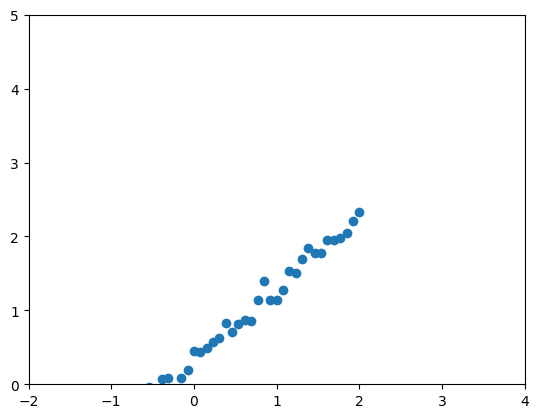

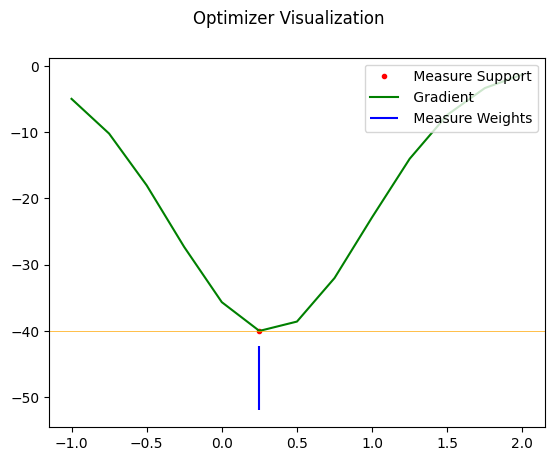

In [2]:

N=13
w = torch.tensor([1/N]*N)
l = torch.linspace(-1,2,N)
w = torch.nn.parameter.Parameter(w)
l = torch.nn.parameter.Parameter(l)

m=pm.Measure(l,w)

sample_length = 40
h=1.06*N**(-1/5)
print(h)
lo = -1
hi =  2
x = torch.linspace(lo, hi, sample_length)
y = x + 0.3 + 0.1*torch.randn(sample_length)


lr = 0.01
opt = pm.Optimizer(m, lr=lr)
opt.minimize(loss_function, max_epochs=1000, verbose=True, adaptive=False)

x=x.detach().numpy()
plt.scatter(x,y)
plt.xlim(-2, 4)
plt.ylim(0, 5)
opt.visualize()
plt.show()